<a href="https://colab.research.google.com/github/abhicse002/Py_DS_libs/blob/main/linear__regression_invoice_amount_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Models**
1. Also called as OLS(Ordinary least square model) / Multiple Linear Regression.
2. Both Feature & Target is a continous variables.
3. Supervised / Regression Type
4. For one unit change in independent variable, how much is Dependent variable changing.


**How to find the missing value of Target wrt Independent variable**
r = coefficient correlation

Linear regression formula
y~ = mx~+c

y~ = std of y
x~ = std of x

1. we have to find the what is m(slope)
m = r(Ceff Corr) * stdy/ stdx

for calculating c only
c = y~ - mx~


now to predict y the use the same foramual fof y = mx+c with the x value as for which vaue u need to predict the value


**How to check if the value predicted is actually proper**..?
1. Predict the value of existing y value with x using c & M value calculated.
It might not be same,u will find difference.

**Calculate Error**
1. **RSS** (Residual sum of squares) is the cost function, will say whether its a best fit line or not.
= Summation of data points [actual - predicted]*2

2. Accuracy is calculayed by R*2 (R Square), higher more accurate
how much variance in the data is learned/capture by Model.
= **1 - (RSS / TSS)** RSS = residual sum of square , TSS = total sum of squares
**TSS = [y(i) - y(mean) Square]**

Higher the R square, better the model



Why R square is called R square ..?why not just R, we are not doing any square if anything here..???























# Task is to Predict Invoice Amount for Customers for them to prepare the Budget based on the Invoice Qty, Weight, Boxes.

In [ ]:
# prompt: import numpy, pandas, matplotlib, seaborn, import data from drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Assuming your data is in a CSV file named 'your_data.csv' in your Google Drive
file_path = '/content/drive/MyDrive/Woolf/MY_DATASETS/invoices.csv'  # Replace with the actual path

try:
    df = pd.read_csv(file_path)
    print(df.head()) # Display first few rows of the dataframe
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.EmptyDataError:
    print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the file at {file_path}. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                        _id  invoice_details[0].invoice_date  \
0  67793e5cb5ff9a8deb0231da                    1735912620000   
1  67793e3d48bebc828bac2cf3                    1735912620000   
2  67793871ac5f6280d039a13c                    1735997520000   
3  6779338bac5f6280d0399f87                    1735996200000   
4  67793388413251a83cae0751                    1735996020000   

  invoice_details[0].sap_doc_no invoice_details[0].tu_no  \
0                       5333379                      NaN   
1                       5333370                      NaN   
2                       5341445               8000023139   
3                       5341417               8000022775   
4                       5341424               8000023112   

  invoice_details[0].delivery_no invoice_details[0].invoice_no  \
0                       83121268              PSST243300061

In [ ]:
df

,_id,invoice_details[0].invoice_date,invoice_details[0].sap_doc_no,invoice_details[0].tu_no,invoice_details[0].delivery_no,invoice_details[0].invoice_no,invoice_details[0].quantity,invoice_details[0].weight,invoice_details[0].invoice_value,invoice_details[0].no_of_boxes
0,67793e5cb5ff9a8deb0231da,1735912620000,5333379,NaN,83121268,PSST243300061773,167.0,52.750,89865.17,5
1,67793e3d48bebc828bac2cf3,1735912620000,5333370,NaN,83118828,PSST243300061767,500.0,160.875,217774.41,13
2,67793871ac5f6280d039a13c,1735997520000,5341445,8000023139,83124000,SUST242700081631,775.0,188.580,232729.05,16
3,6779338bac5f6280d0399f87,1735996200000,5341417,8000022775,83120783,PSST242700081602,260.0,99.380,122711.72,9
4,67793388413251a83cae0751,1735996020000,5341424,8000023112,83120770,PSST242700081608,263.0,101.200,126228.03,9
...,...,...,...,...,...,...,...,...,...,...
19995,675eb4d5f36822ed49d4cb7d,1734259920000,5157459,8000008852,83045917,PSST240600237903,13.0,4.500,5265.16,1
19996,675eb4ccf36822ed49d4cb71,1734259860000,5157365,8000006801,2001634276,PSST242700067416,28.0,8.160,9810.47,1
19997,675eb4c933bde6a5adb14077,1734259860000,5157429,8000008586,2001634235,PSST242700067445,60.0,9.020,13925.71,1
19998,675eb4c624b70d2b1a4f505a,1734259860000,5157366,8000006809,83045708,PSST242700067417,58.0,6.080,6020.01,1


In [ ]:
df = df.drop(columns=['_id', 'invoice_details[0].sap_doc_no', 'invoice_details[0].tu_no', 'invoice_details[0].delivery_no', 'invoice_details[0].invoice_no'])

In [ ]:
df

,invoice_details[0].invoice_date,invoice_details[0].quantity,invoice_details[0].weight,invoice_details[0].invoice_value,invoice_details[0].no_of_boxes
0,1735912620000,167.0,52.750,89865.17,5
1,1735912620000,500.0,160.875,217774.41,13
2,1735997520000,775.0,188.580,232729.05,16
3,1735996200000,260.0,99.380,122711.72,9
4,1735996020000,263.0,101.200,126228.03,9
...,...,...,...,...,...
19995,1734259920000,13.0,4.500,5265.16,1
19996,1734259860000,28.0,8.160,9810.47,1
19997,1734259860000,60.0,9.020,13925.71,1
19998,1734259860000,58.0,6.080,6020.01,1


In [ ]:
df.rename({
    "invoice_details[0].invoice_date": "inv_date",
    "invoice_details[0].quantity": "inv_quantity",
    "invoice_details[0].weight": "inv_weight",
    "invoice_details[0].invoice_value": "inv_value",
    "invoice_details[0].no_of_boxes": "inv_boxes"
}, inplace=True, axis=1)

In [ ]:
df['inv_date'] = pd.to_datetime(df['inv_date'], unit='ms') # convert ms into string
df

,inv_date,inv_quantity,inv_weight,inv_value,inv_boxes
0,2025-01-03 13:57:00,167.0,52.750,89865.17,5
1,2025-01-03 13:57:00,500.0,160.875,217774.41,13
2,2025-01-04 13:32:00,775.0,188.580,232729.05,16
3,2025-01-04 13:10:00,260.0,99.380,122711.72,9
4,2025-01-04 13:07:00,263.0,101.200,126228.03,9
...,...,...,...,...,...
19995,2024-12-15 10:52:00,13.0,4.500,5265.16,1
19996,2024-12-15 10:51:00,28.0,8.160,9810.47,1
19997,2024-12-15 10:51:00,60.0,9.020,13925.71,1
19998,2024-12-15 10:51:00,58.0,6.080,6020.01,1


In [ ]:
df.dtypes

,0
inv_date,datetime64[ns]
inv_quantity,float64
inv_weight,float64
inv_value,float64
inv_boxes,int64


In [ ]:
col_with_zero = df.columns[(df == 0).any()]
col_with_zero.empty

True

In [ ]:
# find the correlation of Independent with Dependent
df.corr()

,inv_date,inv_quantity,inv_weight,inv_value,inv_boxes
inv_date,1.000000,-0.042849,0.096664,0.124720,0.152389
inv_quantity,-0.042849,1.000000,0.260406,0.079910,0.246319
inv_weight,0.096664,0.260406,1.000000,0.848802,0.906928
inv_value,0.124720,0.079910,0.848802,1.000000,0.816578
inv_boxes,0.152389,0.246319,0.906928,0.816578,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


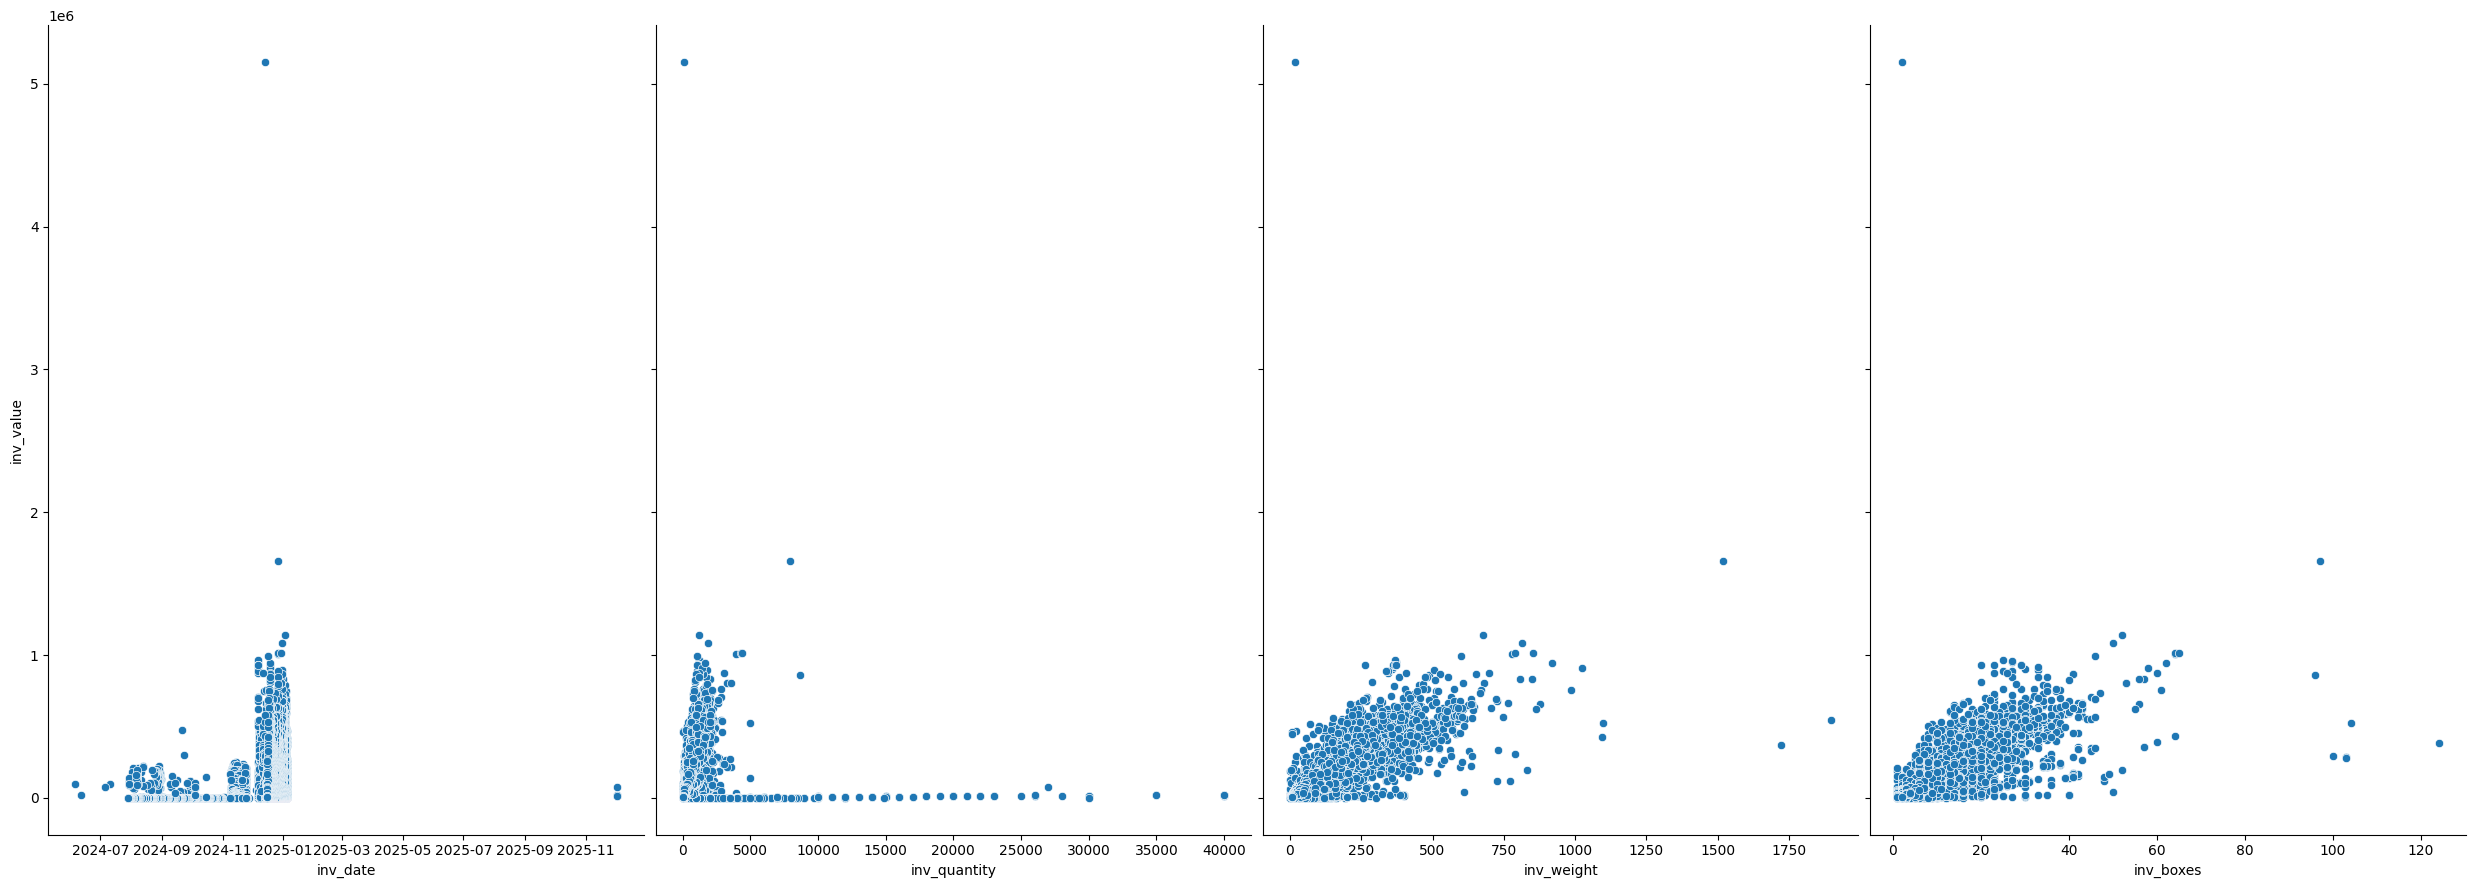

In [ ]:
# Plotting
sns.pairplot(
    x_vars=['inv_date', 'inv_quantity', 'inv_weight', 'inv_boxes'],
    y_vars=['inv_value'],
    data=df,
    kind='scatter',
    size=9,
    aspect=0.7
)
plt.show()


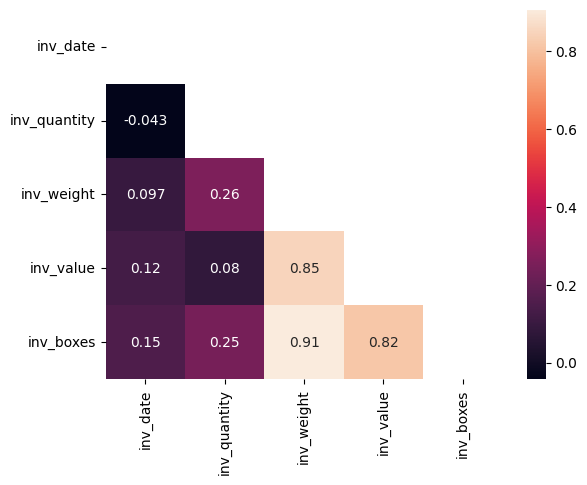

In [ ]:
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()))
# annot gives the correlation values printed inside the boxes
# mask = removes the other part of correlation which is repeating
plt.show()

### **Outliers Treatment**

In [ ]:
q1 = df['inv_quantity'].quantile(0.25)
q3 = df['inv_quantity'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df['inv_quantity'][(df['inv_quantity'] < lower_bound) | (df['inv_quantity'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", outliers.tolist())

Q1: 64.0
Q3: 584.0
IQR: 520.0
Lower Bound: -716.0
Upper Bound: 1364.0
Outliers: [1463.0, 1568.0, 1548.0, 1866.0, 1456.0, 1654.0, 1600.0, 1600.0, 2063.0, 1580.0, 2823.0, 2240.0, 2134.0, 2058.0, 2133.0, 1509.0, 1647.0, 1631.0, 2291.0, 2204.0, 2168.0, 1781.0, 2109.0, 2338.0, 1641.0, 1552.0, 1476.0, 1469.0, 1954.0, 2866.0, 1442.0, 2225.0, 1894.0, 1933.0, 1836.0, 2185.0, 2033.0, 2010.0, 1825.0, 1576.0, 2719.0, 1596.0, 1545.0, 1982.0, 1986.0, 1604.0, 1509.0, 1432.0, 1572.0, 1486.0, 1638.0, 1668.0, 1649.0, 1487.0, 1379.0, 2883.0, 1447.0, 1435.0, 1664.0, 1394.0, 1709.0, 1474.0, 1992.0, 1890.0, 1905.0, 1710.0, 1642.0, 2375.0, 2045.0, 2389.0, 1812.0, 2047.0, 1725.0, 1532.0, 1538.0, 1393.0, 1598.0, 1851.0, 1633.0, 1771.0, 1977.0, 2577.0, 7960.0, 2835.0, 3954.0, 4335.0, 2155.0, 1620.0, 1883.0, 1560.0, 2020.0, 1857.0, 3213.0, 1798.0, 1518.0, 1595.0, 1629.0, 2721.0, 2274.0, 1618.0, 1755.0, 1892.0, 1402.0, 2349.0, 1624.0, 1743.0, 2887.0, 1546.0, 1607.0, 1464.0, 1425.0, 1462.0, 1379.0, 1515.0, 1984.0,

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['inv_quantity']))
threshold = 3
outliers = df[z_scores > threshold]
print(outliers)

        inv_date  inv_quantity  inv_weight  inv_value  inv_boxes
1451  2024-12-27        7960.0     1519.42  1660138.7         97
2416  2024-12-30       28000.0      280.00    14000.0         12
2417  2024-12-30       40000.0      400.00    20000.0         14
2418  2024-12-30       20000.0      200.00    10000.0         10
2419  2024-12-30       40000.0      400.00    20000.0         14
...          ...           ...         ...        ...        ...
17200 2024-12-16       40000.0      386.03    20000.0         30
18858 2024-12-13       14000.0      200.00     5000.0          9
18859 2024-12-13       11000.0      200.00     5000.0          9
18861 2024-12-13        7000.0      200.00     5000.0          7
19578 2024-09-28        8000.0      120.00        1.0          8

[156 rows x 5 columns]


**Question to ponder on removing Outliers**
1. what if the One column has outlier and other dont, and have proper/valid values
2. Removing putliers from One Column only wont effect the other columns which has decent values.
3. What shud be the approach when Each column has different outlier for different rows.

1898.1999999999996

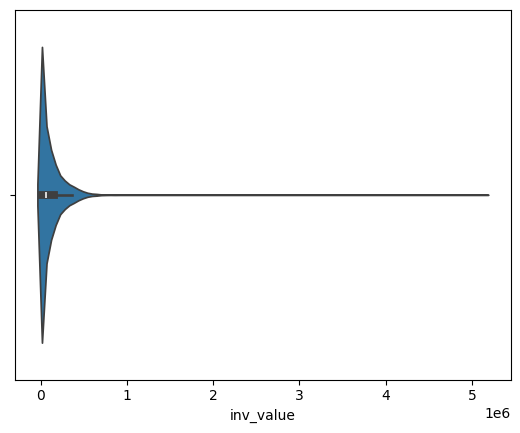